In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from pathlib import Path
import random

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir

'./datasets/flower_photos'

In [3]:
!ls ./datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [4]:
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [5]:
def plot_image(class_name=None, file_name=None):
  if not class_name:
    class_name = classes[random.randint(0, len(classes)-1)]
  if not file_name:
    all_file = os.listdir(os.path.join(data_dir, class_name))
    file_name = all_file[random.randint(0, len(all_file)-1)]
  img = cv2.cvtColor(cv2.imread(os.path.join(data_dir, class_name, file_name)), cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(f'{class_name} {img.shape}')
  plt.axis(False)

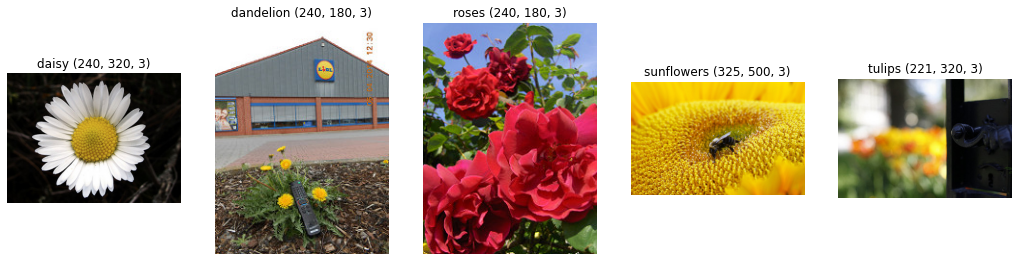

In [6]:
plt.figure(figsize=(18, 8))
for i in range(len(classes)):
  plt.subplot(1, 5, i+1)
  plot_image(classes[i])

In [7]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = train_gen.flow_from_directory(data_dir, target_size=(224, 224))

Found 3670 images belonging to 5 classes.


In [8]:
class_dict = train_data.class_indices
class_dict

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
model_1 = Sequential([
  layers.Conv2D(8, 3, padding='valid', activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(12, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(2),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(5, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 12)      876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        1744      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

In [10]:
history_1 = model_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data))

Epoch 1/10
115/115 [==============================] - 97s 837ms/step - loss: 1.3005 - accuracy: 0.4384
Epoch 2/10
115/115 [==============================] - 96s 833ms/step - loss: 1.0771 - accuracy: 0.5752
Epoch 3/10
115/115 [==============================] - 96s 834ms/step - loss: 0.9670 - accuracy: 0.6278
Epoch 4/10
115/115 [==============================] - 96s 835ms/step - loss: 0.8741 - accuracy: 0.6695
Epoch 5/10
115/115 [==============================] - 96s 837ms/step - loss: 0.7782 - accuracy: 0.7166
Epoch 6/10
115/115 [==============================] - 97s 838ms/step - loss: 0.6466 - accuracy: 0.7668
Epoch 7/10
115/115 [==============================] - 96s 836ms/step - loss: 0.5526 - accuracy: 0.8057
Epoch 8/10
115/115 [==============================] - 96s 838ms/step - loss: 0.4337 - accuracy: 0.8534
Epoch 9/10
115/115 [==============================] - 96s 834ms/step - loss: 0.3520 - accuracy: 0.8826
Epoch 10/10
115/115 [==============================] - 96s 833ms/step - l

In [11]:
def plot_pred_image(class_name=None, file_name=None, custom_file=None):
  if custom_file:
    img = cv2.cvtColor(cv2.imread(custom_file), cv2.COLOR_BGR2RGB)
  else:
    if not class_name:
      class_name = classes[random.randint(0, len(classes)-1)]
    if not file_name:
      all_file = os.listdir(os.path.join(data_dir, class_name))
      file_name = all_file[random.randint(0, len(all_file)-1)]
    img = cv2.cvtColor(cv2.imread(os.path.join(data_dir, class_name, file_name)), cv2.COLOR_BGR2RGB)
  
  pred = model_1.predict(tf.expand_dims(cv2.resize(img, (224, 224)), axis=0) / 255)
  pred = pred.squeeze()
  class_int = np.argmax(pred)
  plt.imshow(img)
  plt.title(f'{round(pred[class_int]*100, 2)}% {classes[class_int]} ({class_name})')
  plt.axis(False)

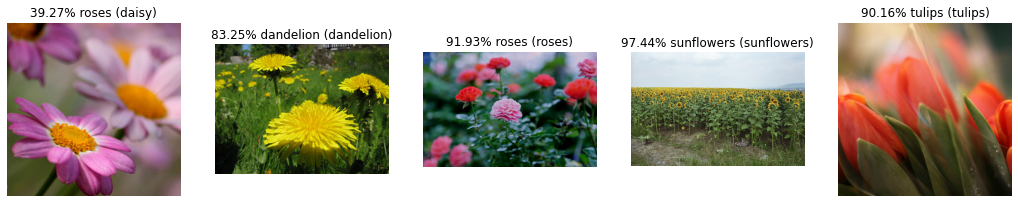

In [12]:
plt.figure(figsize=(18, 8))
for i in range(len(classes)):
  plt.subplot(1, 5, i+1)
  plot_pred_image(classes[i])

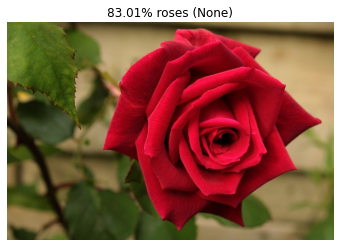

In [18]:
!wget -q https://cdn.pixabay.com/photo/2019/06/28/13/00/red-rose-4304139_960_720.jpg
plot_pred_image(custom_file='red-rose-4304139_960_720.jpg')

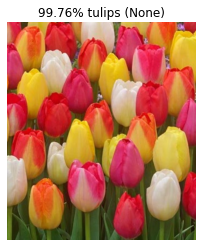

In [19]:
!wget -q https://cdn.webshopapp.com/shops/108044/files/55293608/650x750x1/tulipa-tulip-festival.jpg
plot_pred_image(custom_file='tulipa-tulip-festival.jpg')

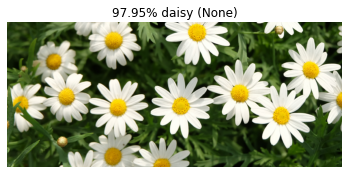

In [20]:
!wget -q https://www.proflowers.com/blog/wp-content/uploads/2020/09/april-birth-flower-daisy-hero.jpg
plot_pred_image(custom_file='april-birth-flower-daisy-hero.jpg')